<a href="https://colab.research.google.com/github/ritikraj660/Image-Classification-using-CNN-and-Transfer-Learning/blob/master/Fruits_360_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset.git

Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 8684, done.
remote: Counting objects: 100% (8684/8684), done.
remote: Compressing objects: 100% (8665/8665), done.
remote: Total 385849 (delta 31), reused 8664 (delta 19), pack-reused 377165
Receiving objects: 100% (385849/385849), 2.10 GiB | 8.88 MiB/s, done.
Resolving deltas: 100% (1191/1191), done.
Checking out files: 100% (90502/90502), done.


In [ ]:
import tensorflow
from tensorflow.python.keras.layers import Input, Dense, Lambda, Flatten
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob



Image_size = [100,100]
epochs = 20
batch_size = 32

In [ ]:
tensorflow.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
train_path = 'Fruit-Images-Dataset/Training'
valid_path = 'Fruit-Images-Dataset/Test'

image_path = glob(train_path+'/*/*.jp*g')
image_valid_path = glob(valid_path+'/*/*.jp*g')

In [ ]:
folders = glob(train_path+'/*')
print(len(folders))

131


In [ ]:
for i in image_valid_path:
  print(type(i))
  break

<class 'str'>


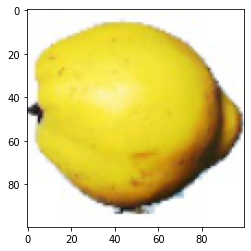

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
plt.imshow(image.load_img(np.random.choice(image_path)))
plt.show()

In [ ]:
vgg = VGG16(input_shape = Image_size+[3], weights='imagenet',include_top = False)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
X = Flatten()(vgg.output)
prediction = Dense(len(folders),activation= 'softmax')(X)

In [ ]:
model = Model(inputs = vgg.input,outputs=prediction)
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [ ]:
gen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range=0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    preprocessing_function = preprocess_input
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 22688 images belonging to 131 classes.
{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape Wh

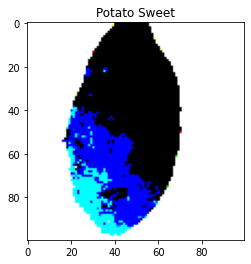

In [ ]:
test_gen = gen.flow_from_directory(valid_path,target_size=Image_size)
print(test_gen.class_indices)
labels = [None]*len(test_gen.class_indices)
for k,v in test_gen.class_indices.items():
  labels[v] = k
print(labels)


for x,y in test_gen:
  print("min: ",x[0].min(),"max :",x[0].max())
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  break

In [ ]:
train_generator = gen.flow_from_directory(
    train_path,
    target_size=Image_size,
    shuffle=True,
    batch_size=batch_size)

vaild_generator = gen.flow_from_directory(
    valid_path,
    target_size = Image_size,
    shuffle = True,
    batch_size = batch_size
    )

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
print(len(image_path)//batch_size)
print(len(image_valid_path)//batch_size)

2115
709


In [ ]:
r = model.fit(
    train_generator,
    validation_data = vaild_generator,
    epochs=epochs,
    steps_per_epoch = len(image_path)//batch_size,
    validation_steps = len(image_valid_path)//batch_size
    )

Epoch 1/20
2115/2115 [==============================] - 272s 128ms/step - loss: 1.6463 - accuracy: 0.8845 - val_loss: 1.7199 - val_accuracy: 0.9101
Epoch 2/20
2115/2115 [==============================] - 274s 130ms/step - loss: 0.3216 - accuracy: 0.9728 - val_loss: 1.2724 - val_accuracy: 0.9346
Epoch 3/20
2115/2115 [==============================] - 272s 128ms/step - loss: 0.2158 - accuracy: 0.9824 - val_loss: 1.3820 - val_accuracy: 0.9338
Epoch 4/20
2115/2115 [==============================] - 268s 127ms/step - loss: 0.1734 - accuracy: 0.9862 - val_loss: 1.3715 - val_accuracy: 0.9405
Epoch 5/20
2115/2115 [==============================] - 269s 127ms/step - loss: 0.1280 - accuracy: 0.9897 - val_loss: 1.4517 - val_accuracy: 0.9407
Epoch 6/20
2115/2115 [==============================] - 276s 131ms/step - loss: 0.1096 - accuracy: 0.9907 - val_loss: 1.1768 - val_accuracy: 0.9531
Epoch 7/20
2115/2115 [==============================] - 267s 126ms/step - loss: 0.1048 - accuracy: 0.9919 - val_

In [ ]:
def gen_confusion_matrix(data_path,N):
  print("Generating confusion matrix",N)
  predictions = []
  targets =[]
  i=0
  for x,y in gen.flow_from_directory(data_path,target_size = Image_size,shuffle=True,batch_size=batch_size):
    p = model.predict(x)
    p = np.argmax(p,axis=1)
    y = np.argmax(y,axis=1)
    predictions = np.concatenate((predictions,p))
    targets = np.concatenate((targets,y))
    if len(targets)>=N:
      break
  cm = confusion_matrix(targets,predictions)
  return cm

Generating confusion matrix 22688
Found 22688 images belonging to 131 classes.


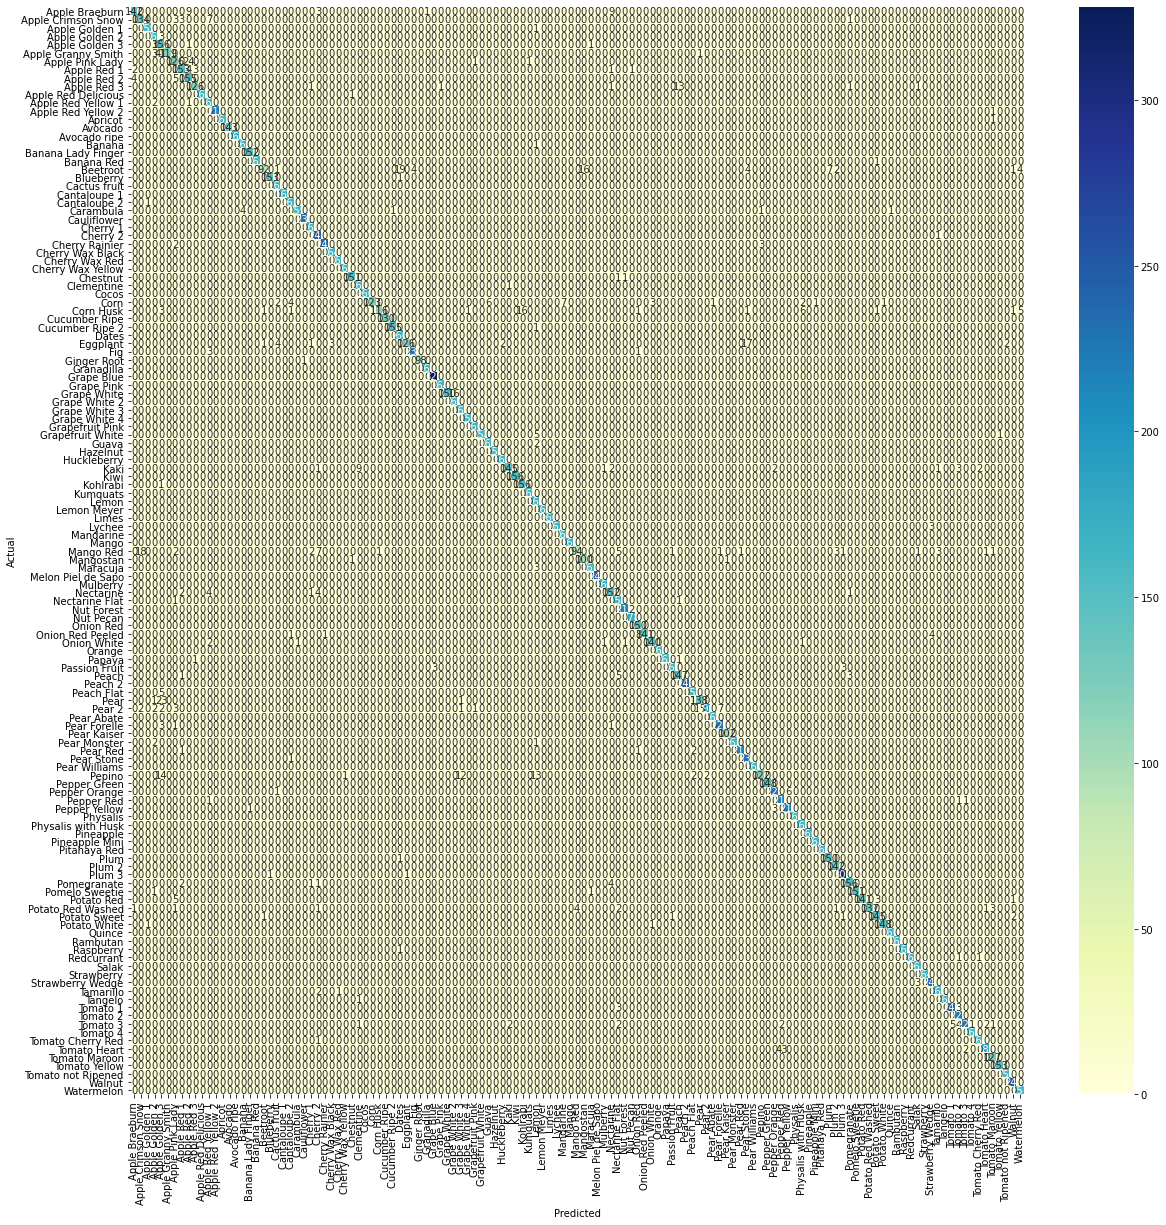

In [ ]:

import seaborn as sns
cm = gen_confusion_matrix(valid_path,len(image_valid_path))
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt='d',
              xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
#print(cm)

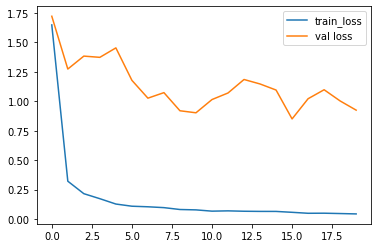

In [ ]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()

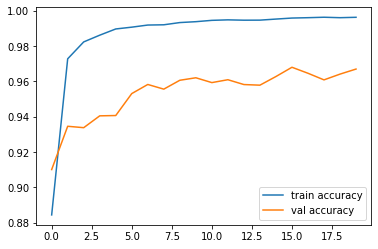

In [ ]:
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()